# 第9章 EM算法及其推广

## Expectation Maximization algorithm

### Maximum likehood function

[likehood & maximum likehood](http://fangs.in/post/thinkstats/likelihood/)

1．EM算法是含有隐变量的概率模型极大似然估计或极大后验概率估计的迭代算法。含有隐变量(latent variable)的概率模型的数据表示为$\theta$ )。这里，$Y$是观测变量的数据，$Z$是隐变量的数据，$\theta$ 是模型参数。EM算法通过迭代求解观测数据的对数似然函数${L}(\theta)=\log {P}(\mathrm{Y} | \theta)$的极大化，实现极大似然估计。每次迭代包括两步：

$E$步，求期望，即求$logP\left(Z | Y, \theta\right)$ )关于$ P\left(Z | Y, \theta^{(i)}\right)$)的期望：

$$Q\left(\theta, \theta^{(i)}\right)=\sum_{Z}P\left(Z | Y, \theta^{(i)}\right) \log P(Y, Z | \theta) $$
称为$Q$函数，这里$\theta^{(i)}$是参数的现估计值；
>**Q 函数**: 完全数据(Y, Z)的**对数似然函数$\log P(Y, Z|\theta)$关于**给定观测数据$Y$的当前参数$\theta^{(i)}$下对未观测数据$Z$的**条件概率分布$P(Z|Y,\theta^{(i)})$的期望**称为Q函数。

$M$步，求极大，即极大化$Q$函数得到参数的新估计值：

$$\theta^{(i+1)}=\arg \max _{\theta} Q\left(\theta, \theta^{(i)}\right)$$
 
在构建具体的EM算法时，重要的是定义$Q$函数。每次迭代中，EM算法通过极大化$Q$函数来增大对数似然函数${L}(\theta)$。

2．EM算法在每次迭代后均提高观测数据的似然函数值，即

$$P\left(Y | \theta^{(i+1)}\right) \geqslant P\left(Y | \theta^{(i)}\right)$$

在一般条件下EM算法是收敛的，但不能保证收敛到全局最优。所以在应用中, 初值的选择变得非常重要, 常用方法是选取几个不同的初值进行迭代, 选择其中估计值最好的.

3．EM算法应用极其广泛，主要应用于含有隐变量的概率模型的学习。高斯混合模型的参数估计是EM算法的一个重要应用，下一章将要介绍的隐马尔可夫模型的非监督学习也是EM算法的一个重要应用。

4．EM算法还可以解释为$F$函数的极大-极大算法。EM算法有许多变形，如GEM算法。GEM算法的特点是每次迭代增加$F$函数值（并不一定是极大化$F$函数），从而增加似然函数值。


> 在统计学中，似然函数（likelihood function，通常简写为likelihood，似然）是一个非常重要的内容，在非正式场合似然和概率（Probability）几乎是一对同义词，但是在统计学中似然和概率却是两个不同的概念。概率是在特定环境下某件事情发生的可能性，也就是结果没有产生之前依据环境所对应的参数来预测某件事情发生的可能性，比如抛硬币，抛之前我们不知道最后是哪一面朝上，但是根据硬币的性质我们可以推测任何一面朝上的可能性均为50%，这个概率只有在抛硬币之前才是有意义的，抛完硬币后的结果便是确定的；而似然刚好相反，是在确定的结果下去推测产生这个结果的可能环境（参数），还是抛硬币的例子，假设我们随机抛掷一枚硬币1,000次，结果500次人头朝上，500次数字朝上（实际情况一般不会这么理想，这里只是举个例子），我们很容易判断这是一枚标准的硬币，两面朝上的概率均为50%，这个过程就是我们运用出现的结果来判断这个事情本身的性质（参数），也就是似然。

$$P (Y|\theta) = \prod[\pi p^{y_i}(1-p)^{1-y_i}+(1-\pi) q^{y_i}(1-q)^{1-y_i}]$$

### E step:

$$\mu^{i+1}=\frac{\pi (p^i)^{y_i}(1-(p^i))^{1-y_i}}{\pi (p^i)^{y_i}(1-(p^i))^{1-y_i}+(1-\pi) (q^i)^{y_i}(1-(q^i))^{1-y_i}}$$

**Y**: 观测到的随机变量数据, 不完全数据(incomplete-data);  
**Z**: 隐随机变量数据;  
Y与Z连在一起称为完全数据(complete-data)

### EM 算法的导出

EM算法能近似实现对观测数据的极大似然估计的原因:  

目标函数: $$L(\theta)=\log P(Y|\theta)=\log \sum_Z P(Y,Z|\theta)=\log(\sum_Z P(Y|Z,\theta)P(Z|\theta))$$
在逐步迭代过程中, 假设第$i$次迭代后的$\theta$的估计值是$\theta^{(i)}$, 我们希望新的$\theta$能使$L(\theta)$增大, 并逐步达到极大值
:
$$
\begin{align}
L(\theta)-L(\theta^{(i)})&=\log \left(\sum_ZP(Y|Z,\theta^{(i)})\frac{P(Y|Z,\theta)P(Z|\theta)}{P(Y|Z,\theta^{(i)})}\right)-\log P(Y|\theta^{(i)})\\
&\ge\sum_Z P(Z|Y,\theta^{(i)})\log \frac{P(Y|Z,\theta)P(Z|\theta)}{P(Z|Y,\theta^{(i)})}-\log P(Y|\theta^{(i)})\\
&=\sum_Z P(Z|Y,\theta^{(i)})\log \frac{P(Y|Z,\theta)P(Z|\theta)}{P(Z|Y,\theta^{(i)})}-\sum_ZP(Z|Y,\theta^{(i)})\log P(Y|\theta^{(i)})\\
&=\sum_ZP(Z|Y,\theta^{(i)})\log \frac{P(Y|Z,\theta)P(Z|\theta)}{P(Z|Y,\theta^{(i)})P(Y|\theta^{(i)})}
\end{align}$$

>使用了Jensen不等式, 对于凹函数log
$$\log \sum_j \lambda_j y_j \ge \sum_j \lambda_j \log y_j,\quad s.t., \lambda_j \ge 0, \sum_j \lambda_j = 1$$

令$$B(\theta, \theta^{(i)}) \hat= L(\theta^{(i)}) + \sum_ZP(Z|Y,\theta^{(i)})[log P(Y|Z,\theta)P(Z|\theta) - logP(Z|Y,\theta^{(i)})P(Y|\theta^{(i)})]$$
则, $L(\theta) \geq B(\theta, \theta^{(i)})$,使$B(\theta, \theta^{(i)})$增大的$\theta$, 也可以使$L(\theta)$增大, 问题变为
$$\begin{aligned}
\theta^{(i+1)} &= \mathop{argmax}_{\theta}B(\theta, \theta^{(i)})  \\
&= \mathop{argmax}_{\theta}\left(\sum_Z P(Z|Y, \theta^{(i)})log(P(Y|Z, \theta)P(Z|\theta)\right) \\
&= \mathop{argmax}_{\theta}\left(\sum_Z P(Z|Y, \theta^{(i)})log(P(Y, Z|\theta)\right) \\
&= \mathop{argmax}_{\theta}Q(\theta, \theta^{(i)})
\end{aligned}$$
等价于EM算法的一次迭代, 即求Q函数及其极大化.

## 高斯混合模型GMM

**混合模型**，有多种，高斯混合模型是最常用的。

高斯混合模型(Gaussian Mixture Model)是具有如下**概率分布**的模型:
$$
P(y|\theta)=\sum\limits^{K}_{k=1}\alpha_k\phi(y|\theta_k)
$$
其中， $\theta=(\alpha_1,\alpha_2,\dots,\alpha_K;\theta_1,\theta_2,\dots,\theta_K)$

$\alpha_k$是系数，$\alpha_k\ge0$，$\sum\limits^{K}_{k=1}\alpha_k=1$, $\phi(y|\theta_k)$ 是**高斯分布密度**，$\theta_k=(\mu,\sigma^2)$
$$
\phi(y|\theta_k)=\frac{1}{\sqrt{2\pi}\sigma_k}\exp\left(-\frac{(y-\mu_k)^2}{2\sigma_k^2}\right)
$$
上式表示第k个**分**模型。
以上, 注意几点：

1. GMM的描述是概率分布，形式上可以看成是加权求和
2. 加权求和的权重$\alpha$满足$\sum_{k=1}^K\alpha_k=1$的约束

3. 求和符号中除去权重的部分，是高斯分布密度(PDF)。高斯混合模型是一种$\sum(权重\times 分布密度)=分布$的表达
    高斯混合模型的参数估计是EM算法的一个重要应用，隐马尔科夫模型的非监督学习也是EM算法的一个重要应用。

4. 书中描述的是一维的高斯混合模型，d维的形式如下[^2]，被称作多元正态分布，也叫多元高斯分布
$$
\phi(y|\theta_k)=\frac{1}{\sqrt{(2\pi)^d|\Sigma|}}\exp\left(-\frac{(y-\mu_k)^T\Sigma^{-1}(y-\mu_k)}{2}\right)
$$
其中，协方差矩阵$\Sigma\in \mathbb{R}^{n\times n}$

5. 另外，关于高斯模型的混合，还有另外一种混合的方式，沿着时间轴的方向做混合。可以理解为滤波器，典型的算法就是Kalman Filter，对应了时域与频域之间的关系，两个高斯的混合依然是高斯，混合的方法是卷积，而不是简单的加法，考虑到的是概率密度的混合，也是一种线性的加权。



使用EM算法估计GMM的参数$\theta$:
#### 1. 明确隐变量,写出完全数据的对数似然函数  
可以设想观测数据$y_j, j=1, 2, \cdots, N$的产生方式: 根据概率$\alpha_k$选择第$k$个高斯分布分模型$\phi(y|\theta_k)$(**未知**), 由它生成观测数据$y_j$(**已知**), 隐变量$\gamma_{jk}$可以表示成:
$$\gamma_{jk}  = \begin{cases}1, \quad 第j个观测来自第k个分模型 \\ 0, \quad otherwise \end{cases} \\ j=1, 2, \cdots, N ; k=1, 2, \cdots, K$$
$\gamma_{jk}$是0-1随机变量.  
完全数据的对数似然函数:
$$\begin{align}
P(y, \gamma|\theta) &= \prod_{j=1}^N P(y_j, \gamma_{j1}, \gamma_{j2}, \cdots, \gamma_{jK}|\theta) \\
&= \prod_{j=1}^N \prod_{k=1}^K[\alpha_k \phi(y_j|\theta_k)]^{\gamma_{jk}} \\
&= \prod_{k=1}^K \alpha_k^{n_k} \prod_{j=1}^N[\phi(y_j|\theta_k)]^{\gamma_{jk}} \\
&= \prod_{k=1}^K \alpha_k^{n_k} \prod_{j=1}^N \left[\frac {1} {\sqrt{2\pi}\sigma_k} exp\left(-\frac {(y_j - u_k)^2}{2\sigma_k^2}\right)\right]^{\gamma_{jk}}
\end{align}$$
 其中$n_k=\sum_{j=1}^N\gamma_{jk}$ (第k个模型共产生了几个观测值, 即被使用了多少次), $\sum_{k=1}^Kn_k=N$(所有的分模型共生成N个观测值)

 完全数据对数似然函数
$$
  \log P(y,\gamma|\theta)=\sum_{k=1}^K\left\{n_k\log \alpha_k+\sum_{j=1}^N\gamma_{jk}\left[\log \left(\frac{1}{\sqrt{2\pi}}\right)-\log \sigma_k -\frac{1}{2\sigma^2}(y_j-\mu_k)^2\right]\right\}
$$

#### 2. E步,确定Q函数

把$Q$ 函数表示成参数形式

$$\begin{aligned}Q(\theta,\theta^{(i)})=&E[\log P(y,\gamma|\theta)|y,\theta^{(i)}]\\=&\color{green}E\left\{\sum_{k=1}^K\left\{\color{red}{n_k}\log \alpha_k+\color{blue}{\sum_{j=1}^N\gamma _{jk}}\left[\log \left(\frac{1}{\sqrt{2\pi}}\right)-\log \sigma _k-\frac{1}{2\sigma^2(y_j-\mu_k)^2}\right]\right\}\right\}\\=&\color{green}E\left\{\sum_{k=1}^K\left\{\color{red}{\sum_{j=1}^N\gamma _{jk}}\log \alpha_k+\color{blue}{\sum_{j=1}^N\gamma _{jk}}\left[\log \left(\frac{1}{\sqrt{2\pi}}\right)-\log \sigma _k-\frac{1}{2\sigma^2(y_j-\mu_k)^2}\right]\right\}\right\}\\=&\sum_{k=1}^K\left\{\color{red}{\sum_{j=1}^{N}(}\color{green}E\color{red}{\gamma_{jk})}\log \alpha_k+\color{blue}{\sum_{j=1}^N}(\color{green}{E}\color{blue}{\gamma _{jk}})\left[\log \left(\frac{1}{\sqrt{2\pi}}\right)-\log \sigma _k-\frac{1}{2\sigma^2(y_j-\mu_k)^2}\right]\right\}\\\end{aligned}$$

$$\begin{aligned}\hat \gamma _{jk}= &\color{purple}{E(\gamma_{jk}|y,\theta)=P(\gamma_{jk}=1|y,\theta)}\\=&\frac{P(\gamma_{jk}=1,y_j|\theta)}{\sum_{k=1}^KP(\gamma_{jk}=1,y_j|\theta)}\\=&\frac{P(y_j|\color{red}{\gamma_{jk}=1,\theta})\color{green}{P(\gamma_{jk}=1|\theta)}}{\sum_{k=1}^KP(y_j|\gamma_{jk}=1,\theta)P(\gamma_{jk}=1|\theta)}\\=&\frac{\color{green}{\alpha_k}\phi(y_j|\color{red}{\theta_k)}}{\sum_{k=1}^K\alpha_k\phi(y_j|\theta_k)}\end{aligned}$$
- 注意这里$E(\gamma_{jk}|y,\theta)$，记为$\hat\gamma_{jk}$， 对应了E步求的**期望**中的一部分。

- $\hat \gamma_{jk}$为分模型$k$对观测数据$y_j$的**响应度**, 即当前模型参数下第j个观测数据来自第k个分模型的概率。这里，紫色标记的第一行参考伯努利分布的期望。

$$Q(\theta,\theta^{(i)})=\sum_{k=1}^Kn_k\log \alpha_k+\sum_{j=1}^N\hat \gamma_{jk}\left[\log \left(\frac{1}{\sqrt{2\pi}}\right)-\log \sigma_k-\frac{1}{2\sigma_k^2}(y_j-\mu_k)^2\right]$$
其中$i$表示第$i$步迭代


#### 3. M步

求函数$Q(\theta,\theta^{(i)})$对$\theta$的极大值，分别求$\sigma, \mu, \alpha$
$$
\theta^{(i+1)}=\arg\max_\theta Q(\theta,\theta^{(i)})
$$

- $\arg\max$ 就是求Q的极值对应的参数$\theta$，如说是离散的，遍历所有值，最大查找，如果是连续的，偏导为零求极值。
- $\frac {\partial Q}{\partial \mu_k}=0, \frac {\partial{Q}}{\partial{\sigma^2}}= 0$  得到$\hat\mu_k, \hat \sigma_k^2$
- 条件$\sum_{k=1}^K\alpha_k=1$, 根据拉格朗日乘子法, 得到$\hat \alpha_k$

$$\hat \mu_k = \frac {\sum_{j=1}^N\hat \gamma_{jk}y_j}{\sum_{j=1}^N\hat \gamma_{jk}}$$
$$\hat \sigma_k^2 = \frac {\sum_{j=1}^N\hat \gamma_{jk}(y_j-\mu_k)^2}{\sum_{j=1}^N\hat \gamma_{jk}}$$
$$\hat \alpha_k= \frac {n_k}{N} = \frac {\sum_{j=1}^N \hat \gamma_{jk}}{N}$$

## GEM 广义期望极大算法

### F函数的极大-极大算法

**F函数**
假设隐变量数据Z的概率分布为$\tilde P(Z)$
$$F(\tilde P, \theta) = E_{\tilde P}[logP(Y|Z, \theta)] + H(\tilde P)$$
式中 $H(\tilde P) = -E_{\tilde P}log\tilde P(Z)$是分布$\tilde P(Z)$的熵

**引理1**: 对于固定的$\theta$, 存在唯一的分布$\tilde P_{\theta}$极大化$F(\tilde P, \theta)$, 这时
$$\tilde P_{\theta}(Z) = P(Z|Y, \theta)$$
**证明1**:
根据约束$\sum_Z \tilde P_{\theta}(Z) = 1$, 拉格朗日函数:
$$
L = \sum_Z \tilde P(Z)logP(Y,Z|\theta) - \sum_Z\tilde P(Z)log\tilde P(Z) + \lambda (1-\sum_Z \tilde P(Z))
$$
将其对$\tilde P$求偏导, 并令其等于0:
$$\frac {\partial L}{\partial \tilde P(Z)} = 
logP(Y, Z|\theta) - log\tilde P_{\theta}(Z) - 1 - \lambda = 0
$$
得:
$$ e^{\lambda + 1} = \frac {P(Y, Z|\theta)} {\tilde P_{\theta}(Z)}$$
再根据约束$\sum_Z \tilde P_{\theta}(Z) = 1$有
$$ \sum_Z e^{\lambda + 1} = \frac{ \sum_Z P(Y, Z|\theta)} { \sum_Z \tilde P_{\theta}(Z)} = \frac {P(Y|\theta)}{1}$$
即 $P(Y|\theta) = e^{\lambda + 1}$, 所以
$$\tilde P_{\theta}(Z) = \frac {P(Y, Z|\theta)} {P(Y|\theta)} = P(Z|Y, \theta)$$

**引理2**: 若$\tilde P_{\theta}(Z) = P(Z|Y, \theta)$, 则
$$F(\tilde P, \theta) = logP(Y|\theta)$$
**证明2**: 
$$\begin{align}
F(\tilde P, \theta) &= \sum_Z \tilde P(Z)logP(Y,Z|\theta) - \sum_Z\tilde P(Z)log\tilde P(Z) \\
&= \sum_Z \tilde P(Z) log\frac {P(Y,Z|\theta)}{P(Y|\theta)} \\
&= \sum_Z \tilde P(Z) logP(Y|\theta) \\ 
&= logP(Y|\theta)
\end{align}
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
np.set_printoptions(precision=5, suppress=True, threshold=20)
%matplotlib inline

### M step:

$$\pi^{i+1}=\frac{1}{n}\sum_{j=1}^n\mu^{i+1}_j$$

$$p^{i+1}=\frac{\sum_{j=1}^n\mu^{i+1}_jy_i}{\sum_{j=1}^n\mu^{i+1}_j}$$

$$q^{i+1}=\frac{\sum_{j=1}^n(1-\mu^{i+1}_jy_i)}{\sum_{j=1}^n(1-\mu^{i+1}_j)}$$

In [2]:
# 例9.1  3枚硬币的例子
class EM:
    def __init__(self, prob, max_iter=None):
        self.pro_A, self.pro_B, self.pro_C = prob
        self.max_iter = max_iter

    # e_step
    def pmf(self, i):
        pro_1 = self.pro_A * math.pow(self.pro_B, data[i]) * math.pow(
            (1 - self.pro_B), 1 - data[i])
        pro_2 = (1 - self.pro_A) * math.pow(self.pro_C, data[i]) * math.pow(
            (1 - self.pro_C), 1 - data[i])
        return pro_1 / (pro_1 + pro_2)

    # m_step
    def fit(self, data):
        count = len(data)
        print('init prob:{}, {}, {}'.format(self.pro_A, self.pro_B,
                                            self.pro_C))
        iter_num = self.max_iter or count
        for d in range(iter_num):
            _ = yield
            _pmf = [self.pmf(k) for k in range(count)]
            pro_A = 1 / count * sum(_pmf)
            pro_B = sum([_pmf[k] * data[k] for k in range(count)]) / sum(
                [_pmf[k] for k in range(count)])
            pro_C = sum([(1 - _pmf[k]) * data[k]
                         for k in range(count)]) / sum([(1 - _pmf[k])
                                                        for k in range(count)])
            print('{}/{}  pro_a:{:.3f}, pro_b:{:.3f}, pro_c:{:.3f}'.format(
                d+1, count, pro_A, pro_B, pro_C))
            self.pro_A = pro_A
            self.pro_B = pro_B
            self.pro_C = pro_C

In [3]:
data=[1,1,0,1,0,0,1,0,1,1]

In [4]:
em = EM(prob=[0.5, 0.5, 0.5], max_iter=6)
f = em.fit(data)
next(f)

init prob:0.5, 0.5, 0.5


In [5]:
i = 1
while True:
    try:
        f.send(i)
    except StopIteration:
        break
    i += 1

1/10  pro_a:0.500, pro_b:0.600, pro_c:0.600
2/10  pro_a:0.500, pro_b:0.600, pro_c:0.600
3/10  pro_a:0.500, pro_b:0.600, pro_c:0.600
4/10  pro_a:0.500, pro_b:0.600, pro_c:0.600
5/10  pro_a:0.500, pro_b:0.600, pro_c:0.600
6/10  pro_a:0.500, pro_b:0.600, pro_c:0.600


In [6]:
# 第一次迭代
f.send(1)

StopIteration: 

In [7]:
# 第二次
f.send(2)

StopIteration: 

In [8]:
em = EM(prob=[0.4, 0.6, 0.7])
f2 = em.fit(data)
next(f2)

init prob:0.4, 0.6, 0.7


In [ ]:
i = 1
while i < 20:
    try:
        f2.send(i)
    except StopIteration:
        break
    i += 1

In [9]:
f2.send(1)

1/10  pro_a:0.406, pro_b:0.537, pro_c:0.643


In [10]:
f2.send(2)

2/10  pro_a:0.406, pro_b:0.537, pro_c:0.643


```
Docstring:
binomial(n, p, size=None)

Draw samples from a binomial distribution.

Samples are drawn from a binomial distribution with specified
parameters, n trials and p probability of success where
n an integer >= 0 and p is in the interval [0,1]. (n may be
input as a float, but it is truncated to an integer in use)

Parameters
----------
n : int or array_like of ints
    Parameter of the distribution, >= 0. Floats are also accepted,
    but they will be truncated to integers.
p : float or array_like of floats
    Parameter of the distribution, >= 0 and <=1.
size : int or tuple of ints, optional
    Output shape.  If the given shape is, e.g., ``(m, n, k)``, then
    ``m * n * k`` samples are drawn.  If size is ``None`` (default),
    a single value is returned if ``n`` and ``p`` are both scalars.
    Otherwise, ``np.broadcast(n, p).size`` samples are drawn.
```

In [11]:
class GMM:
    def __init__(self, tol=0.0001, k=2, random_state=12345):
        self.k = k
        self.tol = tol
        
        self.mu_ = None
        self.alpha_ = None
        self.sigma_ = None
        np.random.seed(random_state)

    def fit(self, y):
        N = len(y)
        K = self.k
        mu_ = np.random.rand(K, 1)
        sigma_ = np.random.rand(K, 1)
        alpha_ = np.ones((K, 1)) / K
        
        y_ = np.reshape(np.tile(y, K), (-1, K), order='F')  # (N, K)
        
        tol = self.tol
        for _ in range(10000):
            mu_last = mu_
            alpha_last = alpha_
            sigma_last = sigma_
            
            # (N, K) / (1, K)
            numerator_ = np.exp(-1.0 * (y_ - mu_.T) ** 2 / (2 * (sigma_ ** 2).T))
            # numerator_ = np.exp(-1.0 * ((y_ - mu_.T) / sigma_.T) ** 2 )
            numerator_ = numerator_ * alpha_.T / sigma_.T
            
            # \sum_{k=1}^K
            denominator_ = np.sum(numerator_, axis=1)[:, np.newaxis]  # (N, )
            gamma_ = numerator_ / denominator_  # (N, K)
            
            # n_k = \sum_{j=1}^N gamma_{jk}
            n_ = np.sum(gamma_, axis=0)[:, np.newaxis]  # (K, 1)
            
            alpha_ = n_ / N
            # (K,1) / (K, 1)
            mu_ = np.sum(gamma_ * y_, axis=0)[:, np.newaxis] / n_
            
            sigma_ = np.sqrt(np.sum(gamma_ * (y_ - mu_.T)**2, axis=0))[:, np.newaxis] / n_
            if abs(mu_ - mu_last).sum() < tol and \
                abs(sigma_ - sigma_last).sum() < tol and \
                abs(alpha_ - alpha_last).sum():
                
                break
        self.mu_ = mu_
        self.alpha_ = alpha_
        self.sigma_ = sigma_
        print(f"alpha: {alpha_}\n mu: {mu_} \n sigma: {sigma_}")

In [12]:
a = np.arange(24).reshape((2, 3, 4))
b = np.arange(16).reshape((4, 4))
res = a @ b
res.shape

(2, 3, 4)

In [13]:
a = np.arange(24).reshape((4, 6, 1, 1))
(a / np.ones((6, 1, 1)) ).shape

(4, 6, 1, 1)

In [14]:
(a * np.ones((1, 6))).shape

(4, 6, 1, 6)

In [ ]:
abs(np.linalg.det(np.random.rand(3, 2, 2)))

In [ ]:
b = np.array([[2.0537 , 3.49785],
  [3.49785, 5.9575 ]])
np.linalg.det(b)

In [ ]:
c = np.arange(4).reshape(2, 2)
c

In [ ]:
d = np.reshape(np.tile(c, (1, 3)), (2, 3, 2))
d 

In [ ]:
np.tile(np.eye(2), (3, 1)).reshape(3, 2, 2)

In [18]:
class GMM_multi:
    # 多维高斯分布
    def __init__(self, tol=0.0001, k=2, random_state=12345):
        self.k = k
        self.tol = tol
        
        self.mu_ = None
        self.alpha_ = None
        self.sigma_ = None
        np.random.seed(random_state)

    def fit(self, y):
        N, p = y.shape 
        K = self.k
        
        y_ = np.reshape(np.tile(y, (1, K)), (N, K, p, 1))  # (N,K,p,1)
        mu_ = np.random.rand(K, p, 1)
#         s_  = np.mean(y_ - mu_, axis=0)
#         sigma_ = s_ @ np.rollaxis(s_, -1, -2)
        # 假设每个维度方差为1, 互相独立
        sigma_ = np.tile(np.eye(p), (K, 1)).reshape(K, p, p)
        # 均匀分布
        alpha_ = np.ones((1, K, 1, 1)) / K
        
#         print(sigma_)
#         print(np.linalg.inv(sigma_))
        tol = self.tol
        for _ in range(10000):
            mu_last = mu_
            alpha_last = alpha_
            sigma_last = sigma_
            
            # N, K, 1, 1
            numerator_ = np.exp(-0.5 * np.rollaxis(y_ - mu_, -1, -2)@np.linalg.inv(sigma_)@(y_ - mu_))
#             print('numerator_ shape:', numerator_.shape)
             # (N, K, 1, 1) / (1, K , 1, 1)
            s = np.linalg.det(sigma_)[:, np.newaxis, np.newaxis] ** 0.5
#             print(sigma_, s)
            numerator_ = numerator_ * alpha_ / s
#             print('numerator_ shape:', numerator_.shape)
            
            # \sum_{k=1}^K
            denominator_ = np.sum(numerator_, axis=1, keepdims=True)  # (N, 1, 1, 1)
            gamma_ = numerator_ / denominator_  # (N, K, 1, 1)
#             print(gamma_.shape)
            
            # n_k = \sum_{j=1}^N gamma_{jk}
            n_ = np.sum(gamma_, axis=0)  # (K, 1, 1)
            
            alpha_ = n_ / N
            
            mu_ = np.sum(gamma_ * y_, axis=0) / n_  # (K p 1)
            
            
            sigma_ = np.sum(gamma_ * ((y_ - mu_) @ np.rollaxis(y_ - mu_, -1, -2)), axis=0) / n_  # (K ,p, p)
            
            if abs(mu_ - mu_last).sum() < tol * p and \
                abs(sigma_ - sigma_last).sum() < tol * p and \
                abs(alpha_ - alpha_last).sum() < tol * K:
                
                break
        self.mu_ = mu_
        self.alpha_ = alpha_
        self.sigma_ = sigma_
        print(f"alpha: {alpha_}\n mu: {mu_} \n sigma: {sigma_}")

In [15]:
from sklearn.datasets import make_blobs

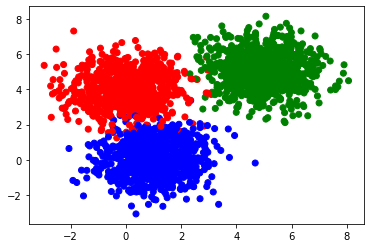

In [16]:
X, y = make_blobs(2400, n_features=2, centers=[[0, 4], [5, 5], [1, 0]], random_state=0x42)
colors = np.array(['r', 'g', 'b'])
plt.scatter(X[:, 0], X[:, 1], color=colors[y])

In [19]:
k = 3
clf = GMM_multi(k=k)
clf.fit(X)

alpha: [[[0.33522]]

 [[0.3354 ]]

 [[0.32938]]]
 mu: [[[ 4.94119]
  [ 5.0562 ]]

 [[ 1.04028]
  [ 0.05938]]

 [[-0.01365]
  [ 4.012  ]]] 
 sigma: [[[ 1.05433 -0.02513]
  [-0.02513  1.03873]]

 [[ 0.97148  0.0642 ]
  [ 0.0642   0.95627]]

 [[ 0.99463  0.0368 ]
  [ 0.0368   0.92   ]]]


In [20]:
np.random.seed(0)
X1 = np.random.normal(1, 0.15, 200)
X2 = np.random.normal(2, 0.15, 200)
alpha = np.random.binomial(1, 0.5, 200)

X = np.where(alpha > 0.5, X1, X2)

(array([ 8., 35., 30., 21.,  1.,  2., 13., 42., 37., 11.]),
 array([0.61705, 0.78924, 0.96142, 1.1336 , 1.30579, 1.47797, 1.65016,
        1.82234, 1.99453, 2.16671, 2.3389 ]),
 <a list of 10 Patch objects>)

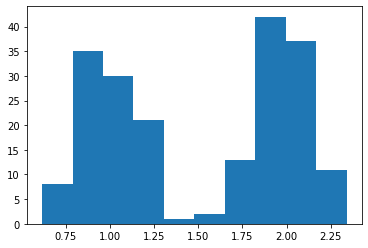

In [21]:
plt.hist(X)

In [22]:
k = 2
clf = GMM(k=k)
clf.fit(X)

alpha: [[0.525]
 [0.475]]
 mu: [[1.9831 ]
 [0.99963]] 
 sigma: [[0.0145 ]
 [0.01624]]


In [23]:
np.sqrt(clf.sigma_)

array([[0.12042],
       [0.12746]])

(array([ 95.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 105.]),
 array([0.96258, 1.06763, 1.17268, 1.27773, 1.38278, 1.48784, 1.59289,
        1.69794, 1.80299, 1.90804, 2.01309]),
 <a list of 10 Patch objects>)

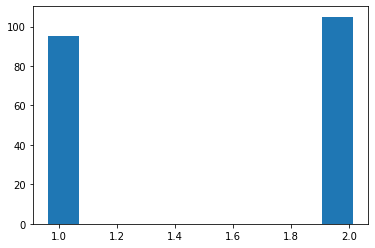

In [24]:
x = []
for i in range(k):
    x1 = np.random.normal(clf.mu_[i, 0], clf.sigma_[i, 0], 200)
    x.extend(np.random.choice(x1, int(clf.alpha_[i] * 200)).ravel())
plt.hist(x)

----
参考代码：https://github.com/wzyonggege/statistical-learning-method

中文注释制作：机器学习初学者

微信公众号：ID:ai-start-com

配置环境：python 3.5+

代码全部测试通过。
![gongzhong](../gongzhong.jpg)